<a href="https://colab.research.google.com/github/shyamjith94/Tensorflow_2.0/blob/master/PROJECT_2_Revenue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import

In [1]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Data Describe



In [2]:
data = pd.read_csv("/content/drive/My Drive/Tensorflow_2.0/Data/SalesData.csv")
data.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [3]:
data.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352520
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [5]:
data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


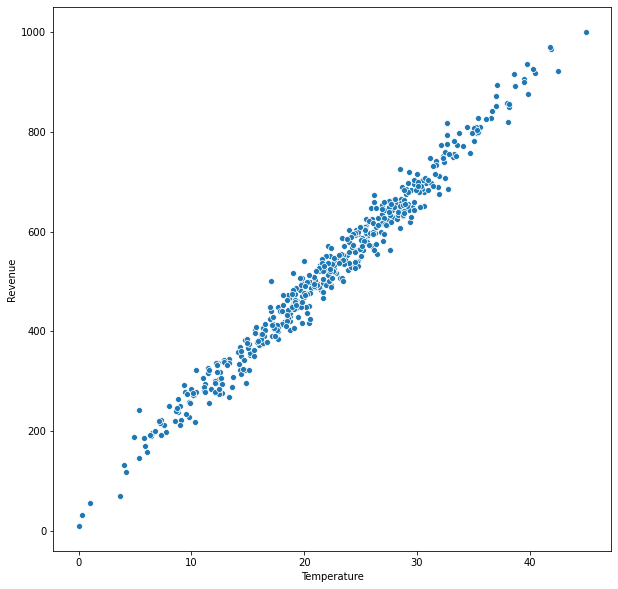

In [6]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data["Temperature"], y=data["Revenue"])

#Model Creation

In [7]:
x_train = data["Temperature"]
y_train = data["Revenue"]

In [8]:
x_train.shape

(500,)

In [9]:
y_train.shape

(500,)

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))
# model.add(tf.keras.layers.Dense(units=1))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss="mean_squared_error")

In [22]:
model_1_hist = model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
16/16 [==============================] - 0s 950us/step - loss: 201961.4219
Epoch 2/1000
16/16 [==============================] - 0s 949us/step - loss: 71729.8047
Epoch 3/1000
16/16 [==============================] - 0s 922us/step - loss: 16941.3965
Epoch 4/1000
16/16 [==============================] - 0s 983us/step - loss: 2165.0344
Epoch 5/1000
16/16 [==============================] - 0s 891us/step - loss: 716.3090
Epoch 6/1000
16/16 [==============================] - 0s 1ms/step - loss: 755.7234
Epoch 7/1000
16/16 [==============================] - 0s 1ms/step - loss: 706.6608
Epoch 8/1000
16/16 [==============================] - 0s 1ms/step - loss: 684.0018
Epoch 9/1000
16/16 [==============================] - 0s 1ms/step - loss: 683.2988
Epoch 10/1000
16/16 [==============================] - 0s 1ms/step - loss: 683.8815
Epoch 11/1000
16/16 [==============================] - 0s 902us/step - loss: 681.6164
Epoch 12/1000
16/16 [==============================] - 0s 1ms/ste

In [14]:
model_1_hist.history.keys()

dict_keys(['loss'])

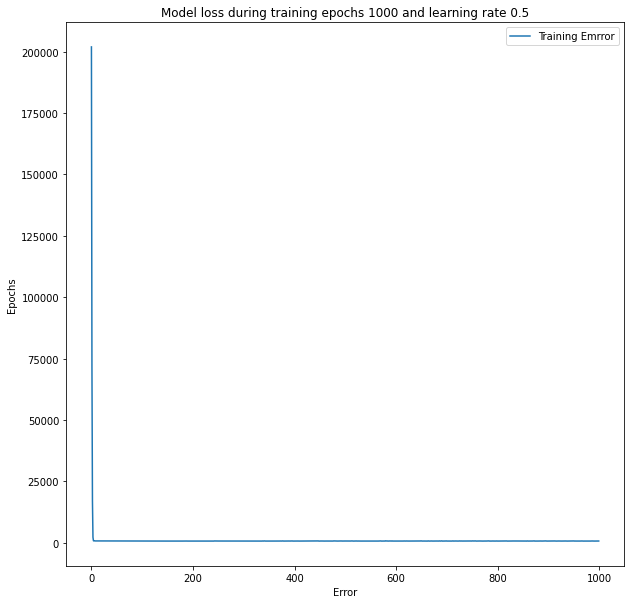

In [23]:
plt.figure(figsize=(10,10))
plt.plot(model_1_hist.history['loss'])
plt.title("Model loss during training epochs 1000 and learning rate 0.5")
plt.xlabel("Error")
plt.ylabel("Epochs")
plt.legend(["Training Emrror"])

In [24]:
model.get_weights() # intercept and slop

[array([[21.263483]], dtype=float32), array([44.87076], dtype=float32)]

In [25]:
temp = 40
revenue = model.predict([temp])
print("Revenue predicting using ANN", revenue)

Revenue predicting using ANN [[895.4101]]


Text(0.5, 1.0, 'Revenue estimated VS Temperature @ice cream Stand')

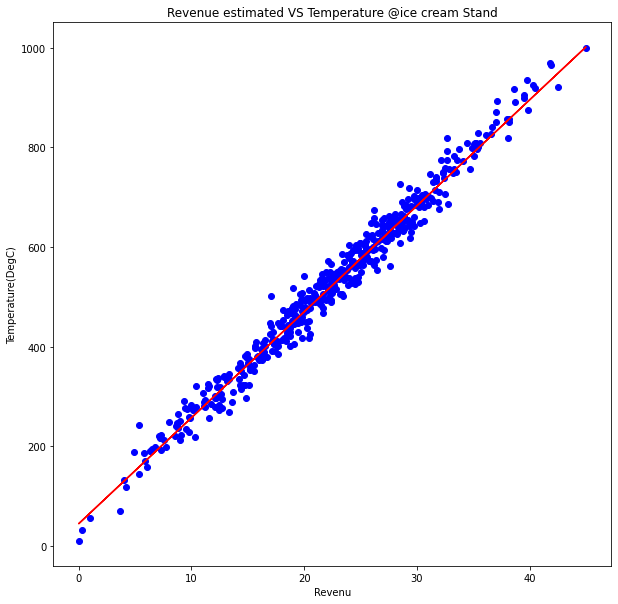

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(x_train, y_train, color="blue")
#prediction line
plt.plot(x_train, model.predict(x_train), color="red")
plt.xlabel("Revenu")
plt.ylabel("Temperature(DegC)")
plt.title("Revenue estimated VS Temperature @ice cream Stand")

#Using Sklearn Regression

Reshape data

In [28]:
x_train = x_train.values.reshape(-1, 1)
x_train

array([[24.56688442],
       [26.00519115],
       [27.79055388],
       [20.59533505],
       [11.50349764],
       [14.35251388],
       [13.70777988],
       [30.83398474],
       [ 0.97686999],
       [31.66946458],
       [11.45525338],
       [ 3.66466958],
       [18.81182403],
       [13.62450892],
       [39.53990899],
       [18.48314099],
       [25.93537514],
       [42.51528041],
       [29.58948056],
       [21.77594799],
       [25.45783637],
       [15.21456942],
       [22.61931574],
       [16.25872074],
       [23.88172478],
       [18.97830025],
       [15.6614643 ],
       [29.18504465],
       [19.02461092],
       [35.12015142],
       [24.18393726],
       [15.23119012],
       [ 8.79095281],
       [18.23322784],
       [35.62892497],
       [37.05754246],
       [22.28455032],
       [17.51707397],
       [31.7379196 ],
       [17.04973761],
       [23.0034888 ],
       [ 8.75555394],
       [18.77535808],
       [14.10966102],
       [18.63391286],
       [15

In [33]:
y_train = y_train.reshape(-1,1)
y_train

array([[ 534.7990284 ],
       [ 625.1901215 ],
       [ 660.6322888 ],
       [ 487.7069603 ],
       [ 316.2401944 ],
       [ 367.9407438 ],
       [ 308.8945179 ],
       [ 696.7166402 ],
       [  55.39033824],
       [ 737.8008241 ],
       [ 325.9684084 ],
       [  71.16015301],
       [ 467.4467066 ],
       [ 289.5409341 ],
       [ 905.4776043 ],
       [ 469.9090332 ],
       [ 648.2099977 ],
       [ 921.508275  ],
       [ 649.5611747 ],
       [ 534.6228653 ],
       [ 612.1539491 ],
       [ 353.3256334 ],
       [ 524.2361154 ],
       [ 374.231135  ],
       [ 523.1245467 ],
       [ 473.6043349 ],
       [ 402.4553204 ],
       [ 679.3177906 ],
       [ 517.5340283 ],
       [ 809.6720534 ],
       [ 528.3804165 ],
       [ 356.0980075 ],
       [ 237.7639106 ],
       [ 418.1372788 ],
       [ 809.4634112 ],
       [ 870.7659159 ],
       [ 550.2785159 ],
       [ 405.6614459 ],
       [ 740.9356848 ],
       [ 501.7329901 ],
       [ 539.6880057 ],
       [ 242.236

In [43]:
regression =  LinearRegression(fit_intercept=True)
regression


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
regression.fit(x_train, y_train)
print("Linear model coeff(m) slope", regression.coef_)
print("Linear model coeff(b) intercept ", regression.intercept_)

Linear model coeff(m) slope [[21.44362551]]
Linear model coeff(b) intercept  [44.83126709]


Text(0.5, 1.0, 'Revenue estimated VS Temperature using Regression @ice cream Stand')

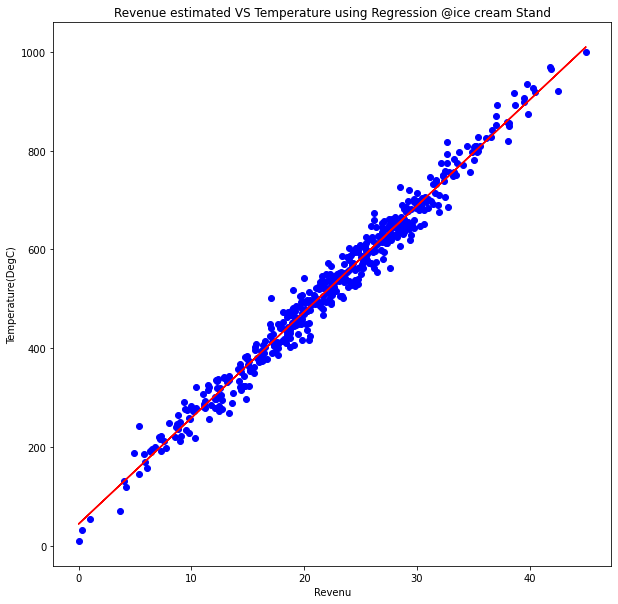

In [45]:
plt.figure(figsize=(10,10))
plt.scatter(x_train, y_train, color="blue")
#prediction line
plt.plot(x_train, regression.predict(x_train), color="red")
plt.xlabel("Revenu")
plt.ylabel("Temperature(DegC)")
plt.title("Revenue estimated VS Temperature using Regression @ice cream Stand")

In [48]:
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(units=10, input_shape=[1]))
model_2.add(tf.keras.layers.Dense(units=1))

In [50]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [51]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss="mean_squared_error")

In [53]:
model_2_hist = model_2.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
16/16 [==============================] - 0s 1ms/step - loss: 660.6649
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 722.2964
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 647.7194
Epoch 4/1000
16/16 [==============================] - 0s 1ms/step - loss: 663.7732
Epoch 5/1000
16/16 [==============================] - 0s 1ms/step - loss: 636.2165
Epoch 6/1000
16/16 [==============================] - 0s 1ms/step - loss: 738.0216
Epoch 7/1000
16/16 [==============================] - 0s 1ms/step - loss: 754.5683
Epoch 8/1000
16/16 [==============================] - 0s 1ms/step - loss: 736.0009
Epoch 9/1000
16/16 [==============================] - 0s 1ms/step - loss: 674.9601
Epoch 10/1000
16/16 [==============================] - 0s 1ms/step - loss: 681.2309
Epoch 11/1000
16/16 [==============================] - 0s 1ms/step - loss: 659.9810
Epoch 12/1000
16/16 [==============================] - 0s 1ms/step - loss: 790.7226
E

In [55]:
model_2.get_weights()

[array([[ 0.04538657,  4.8947363 , -0.16861744,  0.10069041,  0.3637224 ,
         -0.47459742, -0.25311375, -0.17716084, -0.1045442 , -0.19529787]],
       dtype=float32),
 array([ -1.1361036, -10.989756 ,   4.0733967,  -2.5219364,  -8.571163 ,
         11.867301 ,   6.317128 ,   4.401743 ,   2.610597 ,   4.8815746],
       dtype=float32),
 array([[-9.9798921e-04],
        [ 4.4140806e+00],
        [-7.6725902e-03],
        [-2.8601114e-03],
        [ 2.5165627e-02],
        [-1.2468667e-02],
        [ 2.0778298e-03],
        [-7.7300612e-04],
        [ 1.0039581e-03],
        [ 2.8869049e-03]], dtype=float32),
 array([94.69017], dtype=float32)]

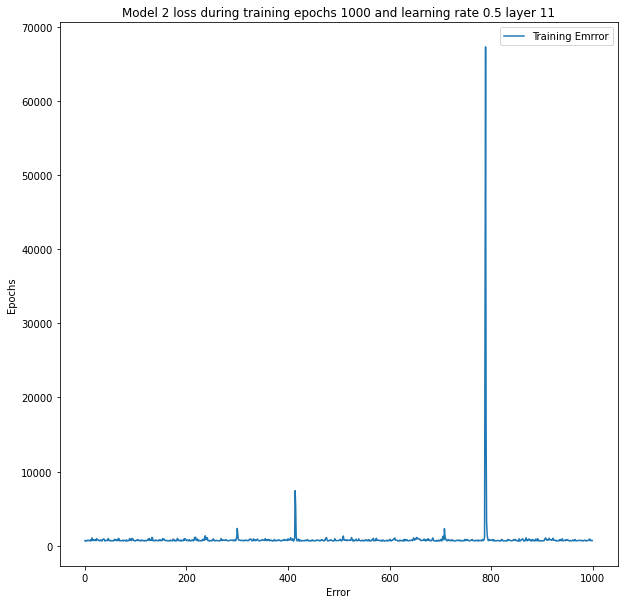

In [56]:
plt.figure(figsize=(10,10))
plt.plot(model_2_hist.history['loss'])
plt.title("Model 2 loss during training epochs 1000 and learning rate 0.5 layer 11")
plt.xlabel("Error")
plt.ylabel("Epochs")
plt.legend(["Training Emrror"])

Text(0.5, 1.0, 'Model 2 Revenue estimated VS Temperature using Regression @ice cream Stand')

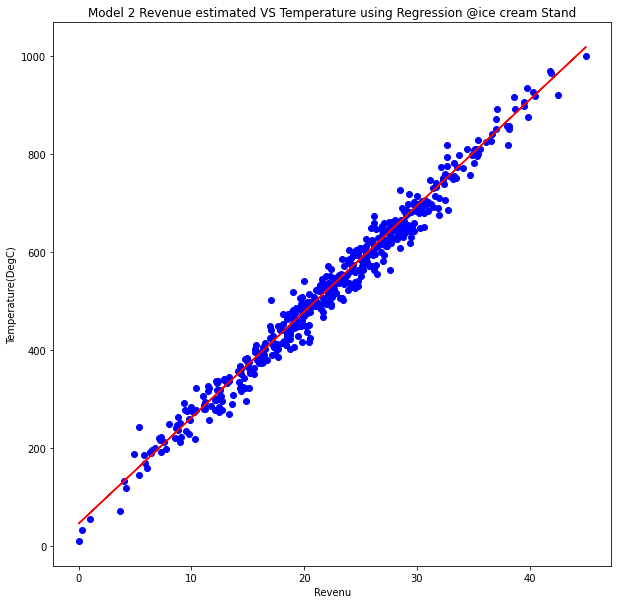

In [58]:
plt.figure(figsize=(10,10))
plt.scatter(x_train, y_train, color="blue")
#prediction line
plt.plot(x_train, model_2.predict(x_train), color="red")
plt.xlabel("Revenu")
plt.ylabel("Temperature(DegC)")
plt.title("Model 2 Revenue estimated VS Temperature using Regression @ice cream Stand")